# Weather in Honolulu, Hawaii

In [1]:
#Add dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import calendar

## _Reflect Tables into SQLAlchemy ORM (Object Relational Mapper)_

In [2]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
#SQL Use Tool
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [4]:
#Reflect database into new model
Base = automap_base()

#Reflect the tables and pass in the engine
Base.prepare(engine, reflect=True)

In [5]:
#Find classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [6]:
#Label tables from classes
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
#Create a session and bind it to the engine
session = Session(engine)

In [8]:
#Start an inspect of engine to obtain data information
inspector = inspect(engine)

In [9]:
#List column names and types for class Station
data = inspector.get_columns('Station')
for stations in data:
    print(stations['name'], stations['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
#List column names and types for class Measurement
info = inspector.get_columns('Measurement')
for measures in info:
    print(measures['name'], measures['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## Exploratory Climate Analysis

### _Most Recent 12 months of Precipitation Data_

In [11]:
#Find the most recent date
recent = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
recent

('2017-08-23')

In [12]:
#Find the date from 1 year/12 months/365 days ago
new = datetime.date(2017,8,23) - datetime.timedelta(days=365)
print("Query Date: ", new)

Query Date:  2016-08-23


In [13]:
#Find all dates and prcp within last 12 months
results = (session
           .query(Measurement.date,Measurement.prcp)
           .filter(Measurement.date >= new, Measurement.prcp != None)
           .all())
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08', 

In [14]:
#Place query results into a pandas dataframe by date
data = pd.DataFrame(results,columns=['Date', 'Precipitation'])
shape = data.set_index('Date')
organize = shape.sort_values(by ='Date')
organize

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


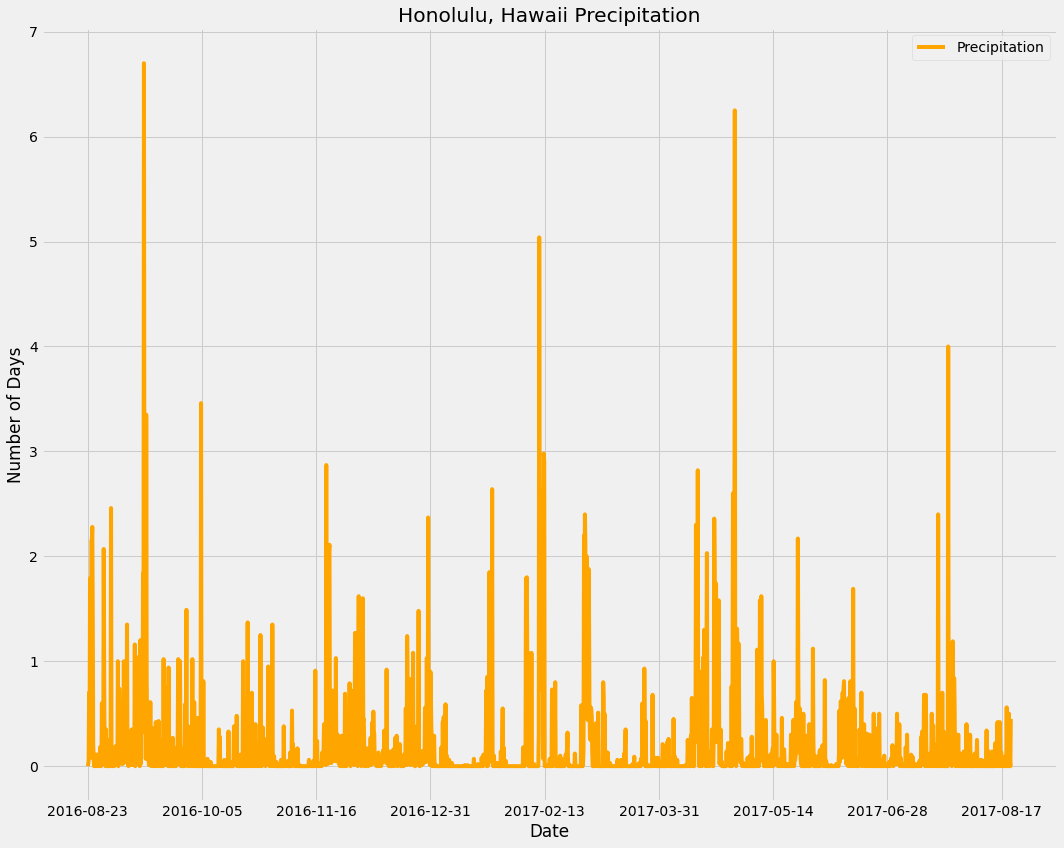

In [15]:
#Plot the precipitation date
organize.plot(figsize=(15,12),color='orange')
plt.title('Honolulu, Hawaii Precipitation')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.savefig('PrecipitationPlot.png')

In [16]:
#Find summary statistics for the precipitation data
data.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### _Station Analysis_


In [17]:
#Count the number of stations within the dataset
locations = session.query(Measurement.station).distinct().count()
locations

9

In [18]:
#List the stations based on frequency in dataset
activity = session.query(Measurement.station,func.count(Measurement.station))\
            .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
#Find the most active station based on frequency in dataset
most = session.query(Measurement.station,func.count(Measurement.station))\
            .group_by(Measurement.station)\
            .order_by(func.count(Measurement.station).desc()).first()       
most

('USC00519281', 2772)

In [20]:
#Grab most active station id
most_station = most[0]
most_station

'USC00519281'

In [21]:
#Find the lowest temp, highest temp, and average temp for most active station (Currently USC00519281)
temperature = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_station).order_by(func.min(Measurement.tobs)).all()
temperature

[(54.0, 85.0, 71.66378066378067)]

In [22]:
#Find all temperatures from within the last 12 months at the most active station (Currently USC00519281)
lake = session.query(Measurement.tobs)\
        .filter(Measurement.date >= new, Measurement.station == most_station)\
        .order_by(Measurement.tobs).all()
lake

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

In [23]:
#Place temperature observation data in a dataframe
year = pd.DataFrame(lake, columns=['Tobs'])
year.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


In [24]:
#Find station name (Currently based on station id USC00519281)
most_name = session.query(Station.name).filter(Station.station == most_station).all()
print(str(most_name))

[('WAIHEE 837.5, HI US',)]


In [28]:
#Grab most active station name
rename = most_name[0]
rename

('WAIHEE 837.5, HI US')

In [30]:
#Grab most active station name and drop formatting
name = rename[0]
name

'WAIHEE 837.5, HI US'

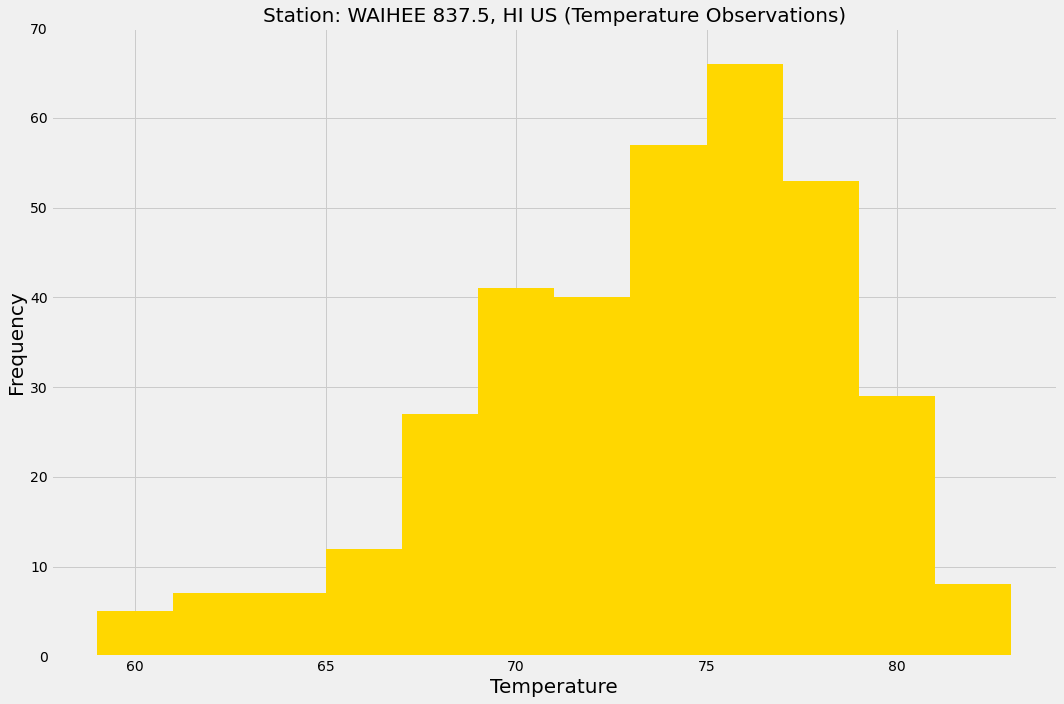

In [31]:
#Plot station temperature observations into a Histogram
plt.subplots(figsize=(15,10))
plt.hist(year, bins= 12, color= 'gold')
plt.ylim(0,70)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title(f'Station: {name} (Temperature Observations)',fontsize=20)
plt.tight_layout()
plt.savefig('station_histogram.png')

## Further Analysis

### _Temperature Analysis I_

In [ ]:
#Find and return temperature average for all station in June
def station_average (month):
    
    return (session.query(Measurement.station,func.avg(Measurement.tobs))
                    .filter(func.strftime("%m", Measurement.date)== month)
                    .group_by(Measurement.station)
                    .order_by(func.avg(Measurement.tobs).desc()).all())

print(station_average("06"))

In [ ]:
#Find and return temperature average for all station in December
print(station_average("12"))

In [ ]:
#Find the most active stations based on frequency in dataset
test = Session.query(Measurement.station,func.avg(Measurement.tobs))\
            .group_by(Measurement.station).order_by(func.avg(Measurement.tobs).desc()).all()
test

In [ ]:
#Find all dates and prcp within last 12 months
analysis = (Session
           .query(Measurement.date,Measurement.tobs)
           .filter(Measurement.date >= new, Measurement.prcp != None)
           .all())
results

In [ ]:
#Find the average temp for each station based on frequency in dataset
station_average = Session.query(Measurement.station,func.avg(Measurement.tobs)).\
                    group_by(Measurement.station).order_by(func.avg(Measurement.tobs).desc()).all()
station_average

In [ ]:
#Find the lowest temp, highest temp, and average temp for most active station USC00519281
temperature = Session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
temperature

### _Temperature Analysis II_

In [ ]:
#Find and return the minimum, average, and maximum temperatures for date range
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (Session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

#Result for date range test
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
#Result for actual date range
print(calc_temps('2016-08-23', '2017-08-23'))

In [ ]:
plt.figure(figsize=(3,8))
plt.bar(1,temp_avg, color = 'coral',alpha = 0.5)
plt.errorbar(1,temp_avg, yerr=(tmax - tmin), color = 'k')
plt.ylim(0, 100)
plt.xticks([])
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig('Images/temperature.png')

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == date)
                   .all())
    
daily_normals("01-01")

In [ ]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.avg(Measurement.tobs))
                   .filter(func.strftime("%m", Measurement.date) == date)
                   .all())
    
daily_normals("06")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`